In [1]:
import pandas as pd
import numpy as np

In [2]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(X):
    return np.maximum(0,X)

def tanh(x):
    return np.tanh(x)

In [3]:
def derivative_of_relu(X):
    return X>0

In [4]:
def weight_and_bias_init(layers_dimension):
    parameters={}
    for i in range(1,len(layers_dimension)):
        parameters["W"+str(i)]=np.random.randn(layers_dimension[i],layers_dimension[i-1])*0.01
        parameters["b"+str(i)]=np.zeros((layers_dimension[i],1))
        
    return parameters
        

In [5]:
parameters=weight_and_bias_init([3,2,1])

In [6]:
def forward_propagation(parameters,X,Y):
    layers=len(parameters)//2
    cache={}
    A_prev=X
    m=X.shape[1]
    
    for i in range(1,layers):
        Z=np.dot(parameters["W"+str(i)],A_prev)+parameters["b"+str(i)]
        A=relu(Z)
        cache["Z"+str(i)]=Z
        cache["A"+str(i)]=A
        A_prev=A
        
    Z=np.dot(parameters["W"+str(i+1)],A_prev)+parameters["b"+str(i+1)]
    Yp=sigmoid(Z)
    cache["Z"+str(i+1)]=Z
    cache["A"+str(i+1)]=Yp
    
    cost=-(1/m)*np.sum(Y*np.log(Yp)+((1-Y)*np.log(1-Yp)))
    
    return cost,cache
    

In [7]:
X=np.random.randn(3,4)

In [8]:
X.shape

(3, 4)

In [9]:
parameters["W1"].T

array([[ 0.01193693,  0.00032301],
       [ 0.00869133, -0.00667864],
       [-0.01753484, -0.01260658]])

In [10]:
Y=np.array([1,0,0,1])

In [11]:

cost,cache=forward_propagation(parameters,X,Y)

In [12]:
cache

{'Z1': array([[ 0.00460573,  0.01456952,  0.00812194,  0.01255274],
        [-0.01729967, -0.00087828,  0.00342449,  0.02513075]]),
 'A1': array([[0.00460573, 0.01456952, 0.00812194, 0.01255274],
        [0.        , 0.        , 0.00342449, 0.02513075]]),
 'Z2': array([[6.76325665e-05, 2.13945292e-04, 1.08104583e-04, 1.02420926e-04]]),
 'A2': array([[0.50001691, 0.50005349, 0.50002703, 0.50002561]])}

In [13]:
# # for i in range(1,2):
#     print(parameters["W"+str(i)].shape)

In [14]:
# for i in range(1,3):
#     print(cache["A"+str(i)].shape)

In [15]:
parameters

{'W1': array([[ 0.01193693,  0.00869133, -0.01753484],
        [ 0.00032301, -0.00667864, -0.01260658]]), 'b1': array([[0.],
        [0.]]), 'W2': array([[ 0.01468444, -0.00325931]]), 'b2': array([[0.]])}

In [16]:
# def backward_propagation(X,Y,cache,parameters):
#     n_layers=len(cache)//2
#     backprob={}
#     m=X.shape[1]
    
#     backprob["dZ"+str(n_layers)]=cache["A"+str(n_layers)]-Y
#     backprob["dW"+str(n_layers)]=(1/m)*np.dot(backprob["dZ"+str(n_layers)],cache["A"+str(n_layers-1)].T)
#     backprob["db"+str(n_layers)]=(1/m)*np.sum(backprob["dZ"+str(n_layers)],axis=1,keepdims=True)
#     for layers in range(n_layers-1,0,-1):
#         print(layers)
#         if layers>1:
#             backprob["dA"+str(layers)]=np.dot(parameters["W"+str(layers+1)].T,backprob["dW"+str(layers+1)])
#             backprob["dZ"+str(layers)]=np.multiply(backprob["dA"+str(layers)],derivative_of_relu(cache["A"+str(layers)]))
#             backprob["dW"+str(layers)]=(1/m)*np.dot(backprob["dZ"+str(layers)],cache["A"+str(layers-1)].T)
#             backprob["db"+str(layers)]=(1/m)*np.sum(backprob["dZ"+str(layers)],axis=0,keepdims=True)
# #         else:
# #             backprob["dA"+str(layers)]=np.dot(parameters["W"+str(layers+1)],backprob["dW"+str(layers+1)])
# #             backprob["dZ"+str(layers)]=np.multiply(backprob["dA"+str(layers)],derivative_of_relu(cache["A"+str(layers)]))
# #             backprob["dW"+str(layers)]=(1/m)*np.dot(backprob["dZ"+str(layers)],X.T)
# #             backprob["db"+str(layers)]=(1/m)*np.sum(backprob["dZ"+str(layers)],axis=1,keepdims=True)
            
            
#     return backprob
            
        
        
    
    
    
    

In [17]:
parameters.keys()

dict_keys(['W1', 'b1', 'W2', 'b2'])

In [18]:
cache.keys()

dict_keys(['Z1', 'A1', 'Z2', 'A2'])

In [19]:
def backward_propagation(X,Y,cache,parameters):
    layers=len(cache)//2
    bp={}
    m=X.shape[1]
    AL=cache["A"+str(layers)]
    AL_1=cache["A"+str(layers-1)]
    dZ=AL-Y
    dW = 1. / m * np.dot(dZ,AL_1.T)
    db = 1. / m * np.sum(dZ, axis=1, keepdims=True)
    
    bp["dZ"+str(layers)]=dZ
    bp["dW"+str(layers)]=dW
    bp["db"+str(layers)]=db
    for i in range(layers-1,0,-1):
        dZ=bp["dZ"+str(i+1)]
        W=parameters["W"+str(i+1)]
        A=cache["A"+str(i)]
        if i > 1:
            AL_1=cache["A"+str(i-1)]
        else:
            AL_1=X
            
        dA=np.dot(W.T,dZ)
        dZ=np.multiply(dA,derivative_of_relu(A))
        dW=1. / m * np.dot(dZ,AL_1.T)
        db = 1. / m * np.sum(dZ, axis=1, keepdims=True)
        
        bp["dZ"+str(i)]=dZ
        bp["dW"+str(i)]=dW
        bp["db"+str(i)]=db
        
        
        
    return bp
        
        
        
        
        
        

In [20]:
backward_propagation(X,Y,cache,parameters)

{'dZ2': array([[-0.49998309,  0.50005349,  0.50002703, -0.49997439]]),
 'dW2': array([[ 0.00069197, -0.0027131 ]]),
 'db2': array([[3.07564604e-05]]),
 'dZ1': array([[-0.00734197,  0.00734301,  0.00734262, -0.00734184],
        [ 0.        , -0.        , -0.00162975,  0.00162957]]),
 'dW1': array([[-0.00274453,  0.00306884, -0.00092674],
        [ 0.00039053, -0.00083318, -0.00025004]]),
 'db1': array([[ 4.51641392e-07],
        [-4.28855589e-08]])}

In [21]:
def model_(X,Y,layers,lr=0.01,itern=100):
    
    parameters=weight_and_bias_init(layers)
    
    para=parameters.copy()
    for i in range(itern):
        cost,cache=forward_propagation(para,X,Y)
        if i%10==0 or i==itern-1:
            print(f"Epoch {i} cost {cost}" )
        
        backward=backward_propagation(X,Y,cache,para)
        
        for j in range((len(cache)//2),0,-1):
            dW=backward["dW"+str(j)]
            db=backward["db"+str(j)]
            W=para["W"+str(j)]
            b=para["b"+str(j)]
            
            W=W-lr*dW
            b=b-lr*db
            para["W"+str(j)]=W
            para["b"+str(j)]=b
            
            
    return para
            
            
        
    

In [22]:
parameters

{'W1': array([[ 0.01193693,  0.00869133, -0.01753484],
        [ 0.00032301, -0.00667864, -0.01260658]]), 'b1': array([[0.],
        [0.]]), 'W2': array([[ 0.01468444, -0.00325931]]), 'b2': array([[0.]])}

In [23]:
Xdf=pd.read_csv("train_X.csv").values.T
Ydf=pd.read_csv("train_label.csv").values.T
Xdf.shape


(784, 999)

In [24]:
def predict(Xtest,parameters):
    layers=len(parameters)//2
    cache={}
    A_prev=Xtest
    m=Xtest.shape[1]
    
    for i in range(1,layers):
        Z=np.dot(parameters["W"+str(i)],A_prev)+parameters["b"+str(i)]
        A=relu(Z)
        cache["Z"+str(i)]=Z
        cache["A"+str(i)]=A
        A_prev=A
        
    Z=np.dot(parameters["W"+str(i+1)],A_prev)+parameters["b"+str(i+1)]
    Yp=sigmoid(Z)
    cache["Z"+str(i+1)]=Z
    cache["A"+str(i+1)]=Yp
    
    return Yp

In [26]:
params=model_(Xdf,Ydf,[784,1000,500,60,10],lr=0.01,itern=200)

Epoch 0 cost 6.955481701599342
Epoch 10 cost 3.937631243232973
Epoch 20 cost 3.4214328490459294
Epoch 30 cost 2.853556101789326
Epoch 40 cost 2.1886854197582397
Epoch 50 cost 1.684820278904016
Epoch 60 cost 1.3492744847913032
Epoch 70 cost 1.014266877801049
Epoch 80 cost 0.9159234441737871
Epoch 90 cost 0.9921583810432746
Epoch 100 cost 0.6829787353300613
Epoch 110 cost 0.5797469345247304
Epoch 120 cost 0.4790734786742023
Epoch 130 cost 0.44680080010769596
Epoch 140 cost 0.3849218501524489
Epoch 150 cost 0.2541629062016242
Epoch 160 cost 0.2057351959546062
Epoch 170 cost 0.17344931701084665
Epoch 180 cost 0.14841083094435484
Epoch 190 cost 0.12754665281365124
Epoch 199 cost 0.10771153111498578


In [27]:
xtest=pd.read_csv("test_X.csv").values.T
ytest=pd.read_csv("test_label.csv").values.T


In [28]:
YP=predict(xtest,params)

In [29]:
for i in range(1,10):
    print(np.argmax(YP[:,i]))

0
8
0
0
0
0
0
0
0


In [30]:
ytest.shape

(10, 349)

In [31]:
def accuracy(ytest,YP):
    true=0
    false=0
    for i in range(349):
        if np.argmax(YP[:,i])==np.argmax(ytest[:,i]):
            true +=1
        else:
            false +=1
            
    print("Accuracy {:.2f}".format((true*100)/(true+false)))
        

In [32]:
model_no_reg=accuracy(ytest,YP)

Accuracy 88.54


In [33]:
import matplotlib.pyplot as plt

Actual


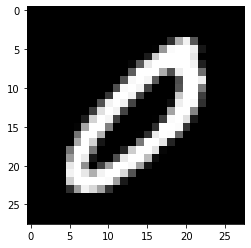

Predicted 0 
----------------------------------------------------------------------------------------------------
Actual


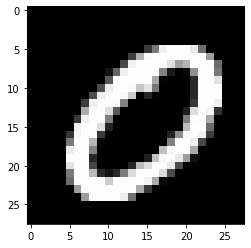

Predicted 0 
----------------------------------------------------------------------------------------------------
Actual


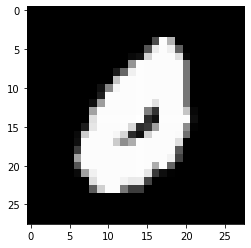

Predicted 8 
----------------------------------------------------------------------------------------------------


In [34]:
for i in range(3):
    print("Actual")
    plt.imshow(xtest[:,i].reshape(28, 28), cmap = 'gray')
    plt.show()
    print("Predicted {} ".format(np.argmax(YP[:,i], 0)))
    print("-"*100)
    

# Regularization Frobenius norm

In [35]:
def forward_propagation_with_reg(parameters,X,Y,lambd):
    layers=len(parameters)//2
    cache={}
    A_prev=X
    m=X.shape[1]
    reg=0
    for i in range(1,layers):
        reg=reg+np.sum(np.square(parameters["W"+str(i)]))
        Z=np.dot(parameters["W"+str(i)],A_prev)+parameters["b"+str(i)]
        A=relu(Z)
        cache["Z"+str(i)]=Z
        cache["A"+str(i)]=A
        A_prev=A
    
    reg=reg+np.sum((parameters["W"+str(i+1)])**2)   
    Z=np.dot(parameters["W"+str(i+1)],A_prev)+parameters["b"+str(i+1)]
    Yp=sigmoid(Z)
    cache["Z"+str(i+1)]=Z
    cache["A"+str(i+1)]=Yp
    
    
        
    
    cost=-(1/m)*np.sum(Y*np.log(Yp)+((1-Y)*np.log(1-Yp)))+(lambd/(2*m))*reg
                                                              
    return cost,cache

In [36]:
def backward_propagation_with_reg(X,Y,cache,parameters,lambd):
    layers=len(cache)//2
    bp={}
    m=X.shape[1]
    AL=cache["A"+str(layers)]
    AL_1=cache["A"+str(layers-1)]
    WL=parameters["W"+str(layers)]
    dZ=AL-Y
    dW = 1. / m * np.dot(dZ,AL_1.T)+(lambd/m)*WL
    db = 1. / m * np.sum(dZ, axis=1, keepdims=True)
    
    bp["dZ"+str(layers)]=dZ
    bp["dW"+str(layers)]=dW
    bp["db"+str(layers)]=db
    for i in range(layers-1,0,-1):
        dZ=bp["dZ"+str(i+1)]
        W=parameters["W"+str(i+1)]
        WL=parameters["W"+str(i)]
        A=cache["A"+str(i)]
        if i > 1:
            AL_1=cache["A"+str(i-1)]
        else:
            AL_1=X
            
        dA=np.dot(W.T,dZ)
        dZ=np.multiply(dA,derivative_of_relu(A))
        dW=1. / m * np.dot(dZ,AL_1.T)+ (lambd/m)*WL
        db = 1. / m * np.sum(dZ, axis=1, keepdims=True)
        
        bp["dZ"+str(i)]=dZ
        bp["dW"+str(i)]=dW
        bp["db"+str(i)]=db
        
        
        
    return bp
        
        
    

In [37]:
def model_reg(X,Y,layers,lambd,lr=0.01,itern=100):
    
    parameters=weight_and_bias_init(layers)
    
    para=parameters.copy()
    for i in range(itern):
        cost,cache=forward_propagation_with_reg(para,X,Y,lambd)
        if i%10==0 or i==itern-1:
            print(f"Epoch {i} cost {cost}" )
        
        backward=backward_propagation_with_reg(X,Y,cache,para,lambd)
        
        for j in range((len(cache)//2),0,-1):
            dW=backward["dW"+str(j)]
            db=backward["db"+str(j)]
            W=para["W"+str(j)]
            b=para["b"+str(j)]
            
            W=W-lr*dW
            b=b-lr*db
            para["W"+str(j)]=W
            para["b"+str(j)]=b
            
            
    return para
            
            
        

In [47]:
params=model_reg(Xdf,Ydf,[784,1000,500,60,10],0.6,lr=0.01,itern=200)

Epoch 0 cost 7.098904220718515
Epoch 10 cost 3.3824144554901623
Epoch 20 cost 3.405468790010044
Epoch 30 cost 2.727379876661664
Epoch 40 cost 2.021735903306594
Epoch 50 cost 1.5914716584768949
Epoch 60 cost 1.2246998721644498
Epoch 70 cost 1.041865664363453
Epoch 80 cost 0.9501084574473846
Epoch 90 cost 0.8198804949964597
Epoch 100 cost 0.661513756611272
Epoch 110 cost 0.5507921450382501
Epoch 120 cost 0.5597082711781877
Epoch 130 cost 0.4090129688205472
Epoch 140 cost 0.335461704802021
Epoch 150 cost 0.2868507023983687
Epoch 160 cost 0.43950486274854295
Epoch 170 cost 0.2219406641919658
Epoch 180 cost 0.18957124562272137
Epoch 190 cost 0.16659003862413613
Epoch 199 cost 0.15008921812801948


In [48]:
YP_reg=predict(xtest,params)


In [49]:
accuracy(ytest,YP_reg)

Accuracy 88.83
